In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from time import time

In [35]:
warnings.filterwarnings(action = 'ignore')
plt.rc('font', family = 'malgun gothic')

# 데이터 불러오기

In [2]:
raw_train = pd.read_csv('C:/Users/whileduck/Desktop/code/dataset/train.csv')
raw_test = pd.read_csv('C:/Users/whileduck/Desktop/code/dataset/test.csv')

pre_train = pd.read_csv('C:/Users/whileduck/Desktop/code/daycon_train.csv')
pre_test = pd.read_csv('C:/Users/whileduck/Desktop/code/daycon_test.csv')

In [3]:
raw_train = raw_train.drop('ID',axis = 1)
raw_test = raw_test.drop('ID',axis = 1)

# 비 부스팅 계열 하이퍼 파라미터 최적화 하기

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict,cross_val_score
from sklearn.metrics import roc_curve,auc,precision_score,recall_score,f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
raw_x = raw_train.drop('전화해지여부',axis = 1)
raw_y = raw_train['전화해지여부']

pre_x = pre_train.drop('전화해지여부',axis = 1)
pre_y = pre_train['전화해지여부']

x_raw_train,x_raw_test,y_raw_train,y_raw_test = train_test_split(raw_x,raw_y, random_state = 42, test_size = 0.2, stratify = raw_y)
x_pre_train,x_pre_test,y_pre_train,y_pre_test = train_test_split(pre_x,pre_y, random_state = 42, test_size = 0.2, stratify = pre_y)


In [12]:
raw_logist = LogisticRegression()
pre_logist = LogisticRegression()

param_grid = {'penalty' : ['l1','l2','elasticnet','None'],
               'C':[0,0.1,0.5,1],
               'max_iter':[100,500,1000]}


raw_grid_logist = GridSearchCV(raw_logist, param_grid = param_grid,verbose = 1, cv = 10, scoring= 'f1_micro')
pre_grid_logist = GridSearchCV(pre_logist, param_grid = param_grid,verbose = 1, cv = 10, scoring= 'f1_micro')

raw_grid_logist.fit(x_raw_train,y_raw_train)
pre_grid_logist.fit(x_pre_train,y_pre_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.1, 0.5, 1], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None']},
             scoring='f1_micro', verbose=1)

In [13]:
print('원본 데이터의 최적의 로지스틱 회귀모형의 파라미터는 :',raw_grid_logist.best_params_)
print('전처리한 데이터의 최적의 로지스틱 회귀모형의 파라미터는 :',pre_grid_logist.best_params_)

logist_raw = raw_grid_logist.best_estimator_
logist_pre = pre_grid_logist.best_estimator_

원본 데이터의 최적의 로지스틱 회귀모형의 파라미터는 : {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
전처리한 데이터의 최적의 로지스틱 회귀모형의 파라미터는 : {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}


In [14]:
raw_tree = DecisionTreeClassifier()
pre_tree = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],
               'max_depth' : range(30),
                'max_leaf_nodes' : ['Any',30,40,50],
                'max_features' : ['auto','sqrt','log2']}

raw_grid_dt = GridSearchCV(raw_tree,param_grid = param_grid, verbose = 1, cv = 10, scoring = 'f1_micro')
pre_grid_dt = GridSearchCV(pre_tree,param_grid = param_grid, verbose = 1, cv = 10, scoring = 'f1_micro')

raw_grid_dt.fit(x_raw_train,y_raw_train)
pre_grid_dt.fit(x_pre_train,y_pre_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 30),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': ['Any', 30, 40, 50]},
             scoring='f1_micro', verbose=1)

In [15]:
print('원본 데이터의 최적의 의사결정나무의 파라미터는 :',raw_grid_dt.best_params_)
print('전처리한 데이터의 최적의 의사결정나무의 파라미터는 :',pre_grid_dt.best_params_)

decision_tree_raw = raw_grid_dt.best_estimator_
decision_tree_pre = pre_grid_dt.best_estimator_

원본 데이터의 최적의 의사결정나무의 파라미터는 : {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 50}
전처리한 데이터의 최적의 의사결정나무의 파라미터는 : {'criterion': 'gini', 'max_depth': 28, 'max_features': 'auto', 'max_leaf_nodes': 40}


In [16]:
raw_knn = KNeighborsClassifier()
pre_knn = KNeighborsClassifier()

param_grid = {'weights' : ['uniform', 'distance'],
              'n_neighbors' :[1,3,5,7,9,11],
              'p':[1,2]}

raw_grid_knn = GridSearchCV(raw_knn, param_grid = param_grid, verbose = 1, cv = 10, scoring = 'f1_micro')
pre_grid_knn = GridSearchCV(pre_knn, param_grid = param_grid, verbose = 1, cv = 10, scoring = 'f1_micro')

raw_grid_knn.fit(x_raw_train,y_raw_train)
pre_grid_knn.fit(x_pre_train,y_pre_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro', verbose=1)

In [17]:
print('원본 데이터의 최적의 KNN의 파라미터는 :',raw_grid_knn.best_params_)
print('전처리한 데이터의 최적의 KNN 파라미터는 :',pre_grid_knn.best_params_)

knn_raw = raw_grid_knn.best_estimator_
knn_pre = pre_grid_knn.best_estimator_

원본 데이터의 최적의 KNN의 파라미터는 : {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
전처리한 데이터의 최적의 KNN 파라미터는 : {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


* 랜덤 포레스트는 조원의 노트북에서 gridsaerch 하여 파라미터값을 추정했다.

In [20]:
rf_raw = RandomForestClassifier(max_depth = 25, max_features = 'auto')
rf_pre = RandomForestClassifier(max_depth = 25, max_features = 'sqrt')

# 모델 별 최적의 Threshold 를 찾아야 합니다 그 이유는 다음과 같습니다

* 임계값의 선택은 분류 모델의 성능에 상당한 영향을 미칠 수 있습니다.
* 임계값이 높으면 긍정적인 예측이 적어지고(즉, 관찰이 긍정적인 클래스에 속함) 거짓 양성률이 낮아지지만 일부 긍정적인 사례가 누락될 수도 있습니다. 
* 반면에 임계값이 낮으면 더 긍정적인 예측과 더 높은 거짓 긍정률이 발생하지만 더 많은 긍정적 사례를 포착할 수도 있습니다.


* 따라서 분류 모델에서 적절한 임계값을 찾는 것이 모델의 정밀도(양의 예측 값)와 재현율(민감도) 사이의 균형을 맞추는 데 도움이 될 수 있으므로 매우 중요합니다. 
* F1 점수 또는 ROC(수신자 작동 특성) 곡선과 같은 다양한 평가 메트릭을 사용하여 주어진 문제에 대한 모델의 성능을 최대화하는 최적의 임계값을 식별할 수 있습니다.

# 분류 모델 간 임계점에 따른 F1 score 의 값의 변화 시각화 하는 함수 만들기

In [21]:
def threshold_graph(target,proba_list,color,model_name):
        
        
        threshold = np.arange(0,1.001,0.001)

        
        for num,proba in enumerate(proba_list):
                
                f1_micro_list = []

                for thr in threshold:
                        
                        result = np.where(proba > thr,1,0)
                        f1_micro_list.append(f1_score(target,result, average = 'micro'))
                                
                        idx = np.argmax(f1_micro_list)
                        
                plt.plot(threshold,f1_micro_list, c = color[num],
                        label = f'{model_name[num]} \n Threshold : {round(threshold[idx],3)} \n F1_score : {np.around(f1_micro_list[idx],3)}')
                        
                plt.plot([0,threshold[idx]],[f1_micro_list[idx],f1_micro_list[idx]],
                        c = color[num], ls = '--',
                        alpha = 0.5)
                        
                plt.plot([threshold[idx],threshold[idx]],[0,f1_micro_list[idx]],
                        c = color[num], ls = '--',
                        alpha = 0.5)
                
        plt.legend(loc = 'lower right')
        plt.xlabel('Threshold')
        plt.ylabel('F1 micro score')
        plt.xticks(ticks = np.arange(0,1,0.1))
        plt.yticks(ticks = np.arange(0,1,0.05))

In [22]:
def threshold_graph_plussize(target,proba_list,color,model_name):
        
        
        threshold = np.arange(0,1.001,0.001)
        
        

        
        for num,proba in enumerate(proba_list):
                
                f1_micro_list = []

                for thr in threshold:
                        
                        result = np.where(proba > thr,1,0)
                        f1_micro_list.append(f1_score(target,result, average = 'micro'))
                                
                        idx = np.argmax(f1_micro_list)
                        
                plt.plot(threshold,f1_micro_list, c = color[num],
                        label = f'{model_name[num]} \n Threshold : {round(threshold[idx],3)} \n F1_score : {np.around(f1_micro_list[idx],3)}')
                        
                plt.plot([0,threshold[idx]],[f1_micro_list[idx],f1_micro_list[idx]],
                        c = color[num], ls = '--',
                        alpha = 0.5)
                        
                plt.plot([threshold[idx],threshold[idx]],[0,f1_micro_list[idx]],
                        c = color[num], ls = '--',
                        alpha = 0.5)
                        
        plt.legend(loc = 'lower right')
        plt.xlabel('Threshold')
        plt.ylabel('F1 micro score')
        plt.xticks(ticks = np.arange(0,1,0.1))
        plt.yticks(ticks = np.arange(0,1,0.01))
        plt.ylim([0.8,0.95])

* 함수를 만들었으니 임계점을 찾기 위해 우선 각 모델 별로 학습시키겠습니다.

In [23]:
raw_models = [logist_raw,decision_tree_raw,knn_raw,rf_raw]
pre_models = [logist_pre,decision_tree_pre,knn_pre,rf_pre]

for model in raw_models:

    model.fit(x_raw_train, y_raw_train)
    
for model in pre_models:

    model.fit(x_pre_train, y_pre_train)
    

* 학습한 데이터를 이용해 새로운 입력값인 test 파일을 예측한 예측값을 담아주도록 하겠습니다

In [37]:
raw_proba_list = []

for model in raw_models:
    
    raw_proba_list.append(model.predict_proba(x_raw_test)[:,1])
    
    
pre_proba_list = []

for model in pre_models:
    
    pre_proba_list.append(model.predict_proba(x_pre_test)[:,1])

# 비 부스팅 계열 임계점에 따른 F1 score 값 변화

Text(0.5, 1.0, '전처리 데이터 사진 확대')

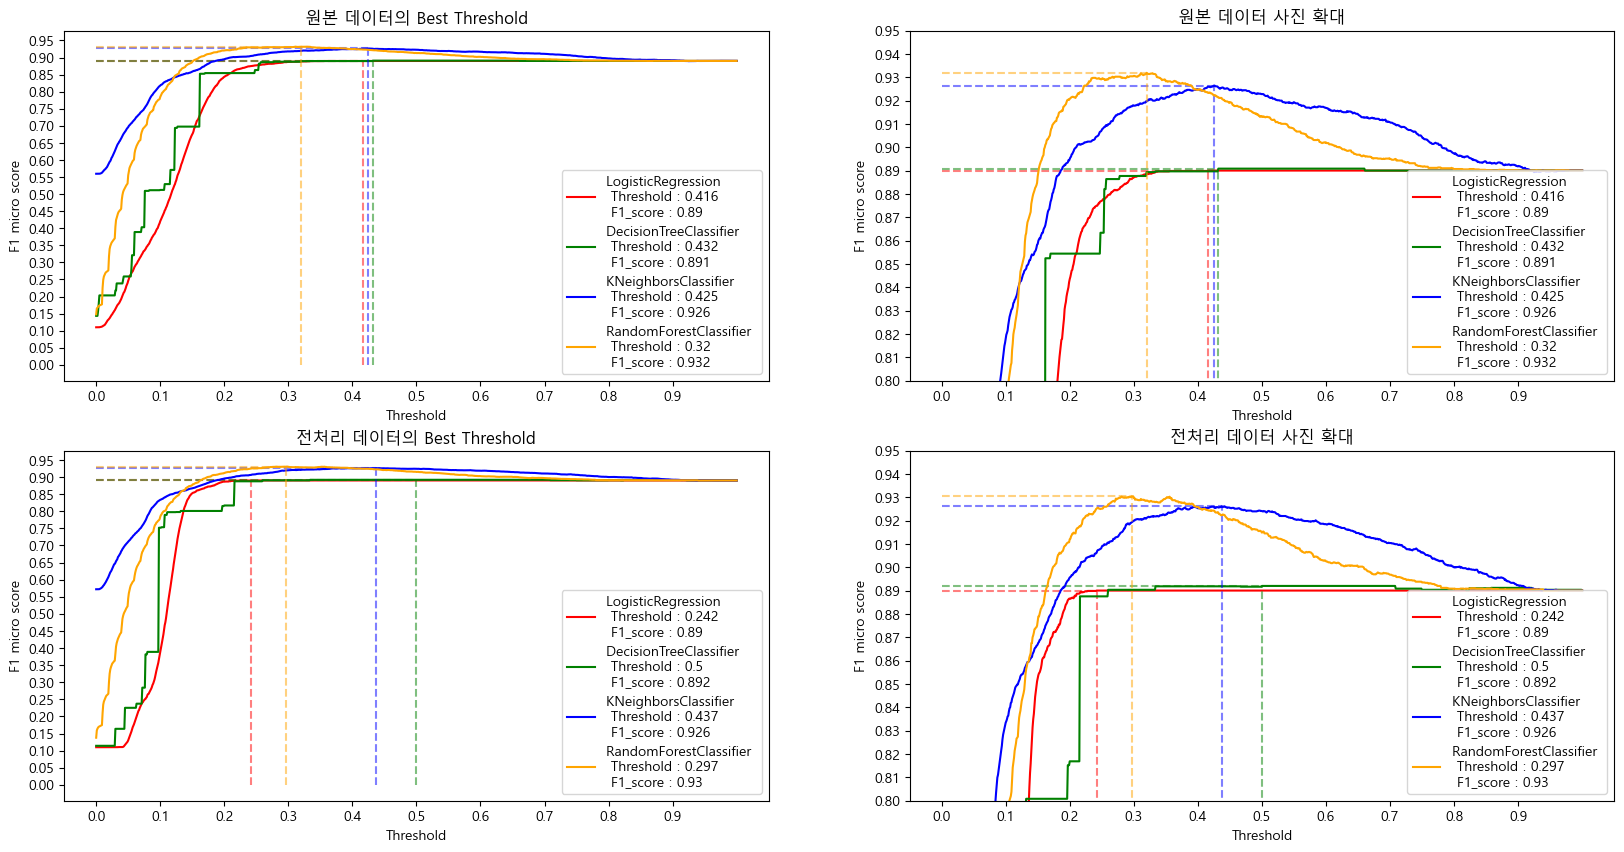

In [38]:
colors = ['red','green','blue','orange']
models_name = ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier']

plt.figure(figsize = [20,10])

plt.subplot(2,2,1)
threshold_graph(y_raw_test,raw_proba_list,colors,models_name)
plt.title('원본 데이터의 Best Threshold')

plt.subplot(2,2,2)
threshold_graph_plussize(y_raw_test,raw_proba_list,colors,models_name)
plt.title('원본 데이터 사진 확대')

plt.subplot(2,2,3)
threshold_graph(y_pre_test,pre_proba_list,colors,models_name)
plt.title('전처리 데이터의 Best Threshold')

plt.subplot(2,2,4)
threshold_graph_plussize(y_pre_test,pre_proba_list,colors,models_name)
plt.title('전처리 데이터 사진 확대')


# 부스팅 모델 

* 부스팅 모델별로는 GridSearch 하는데 시간이 너무 오래 걸려서 다른 노트북 파일에서 시행 후 BestParams 를 찾아왔습니다.

In [26]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

xbg_raw = XGBClassifier(colsample_bytree = 0.9, learning_rate = 0.15, max_depth = 8 , n_estimators = 1000)
xbg_pre = XGBClassifier(colsample_bytree = 0.9, learning_rate = 0.15, max_depth = 8 , n_estimators = 1000)

lgbm_raw = LGBMClassifier(n_estimators = 1000, learning_rate = 0.5,min_child_samples = 10, num_leaves = 125)
lgbm_pre = LGBMClassifier(n_estimators = 1000, learning_rate=  0.5,min_child_samples = 20, num_leaves = 100)

catboost_raw = CatBoostClassifier(max_depth=10, learning_rate=0.1)
catboost_pre = CatBoostClassifier(max_depth=10, learning_rate=0.1)


raw_boosting_models = [xbg_raw,lgbm_raw, catboost_raw]
pre_boosting_models = [xbg_pre,lgbm_pre, catboost_pre]


* 모델 피팅

In [27]:
for model in raw_boosting_models:

    model.fit(x_raw_train, y_raw_train)
    
for model in pre_boosting_models:

    model.fit(x_pre_train, y_pre_train)
    

0:	learn: 0.6114871	total: 164ms	remaining: 2m 43s
1:	learn: 0.5491613	total: 188ms	remaining: 1m 34s
2:	learn: 0.4986092	total: 216ms	remaining: 1m 11s
3:	learn: 0.4602855	total: 243ms	remaining: 1m
4:	learn: 0.4286122	total: 269ms	remaining: 53.6s
5:	learn: 0.4046567	total: 296ms	remaining: 49.1s
6:	learn: 0.3850904	total: 325ms	remaining: 46.1s
7:	learn: 0.3696877	total: 353ms	remaining: 43.8s
8:	learn: 0.3570979	total: 381ms	remaining: 42s
9:	learn: 0.3454054	total: 411ms	remaining: 40.7s
10:	learn: 0.3364669	total: 438ms	remaining: 39.4s
11:	learn: 0.3275890	total: 470ms	remaining: 38.7s
12:	learn: 0.3200182	total: 502ms	remaining: 38.1s
13:	learn: 0.3146473	total: 532ms	remaining: 37.4s
14:	learn: 0.3105616	total: 561ms	remaining: 36.8s
15:	learn: 0.3072958	total: 591ms	remaining: 36.4s
16:	learn: 0.3025675	total: 623ms	remaining: 36s
17:	learn: 0.2994407	total: 653ms	remaining: 35.6s
18:	learn: 0.2970943	total: 685ms	remaining: 35.4s
19:	learn: 0.2937036	total: 718ms	remaining: 

In [39]:
raw_proba_list = []

for model in raw_boosting_models:
    
    raw_proba_list.append(model.predict_proba(x_raw_test)[:,1])
    
    
pre_proba_list = []

for model in pre_boosting_models:
    
    pre_proba_list.append(model.predict_proba(x_pre_test)[:,1])

# 부스팅 계열 임계점에 따른 F1 score 변화

Text(0.5, 1.0, '전처리 데이터 사진 확대')

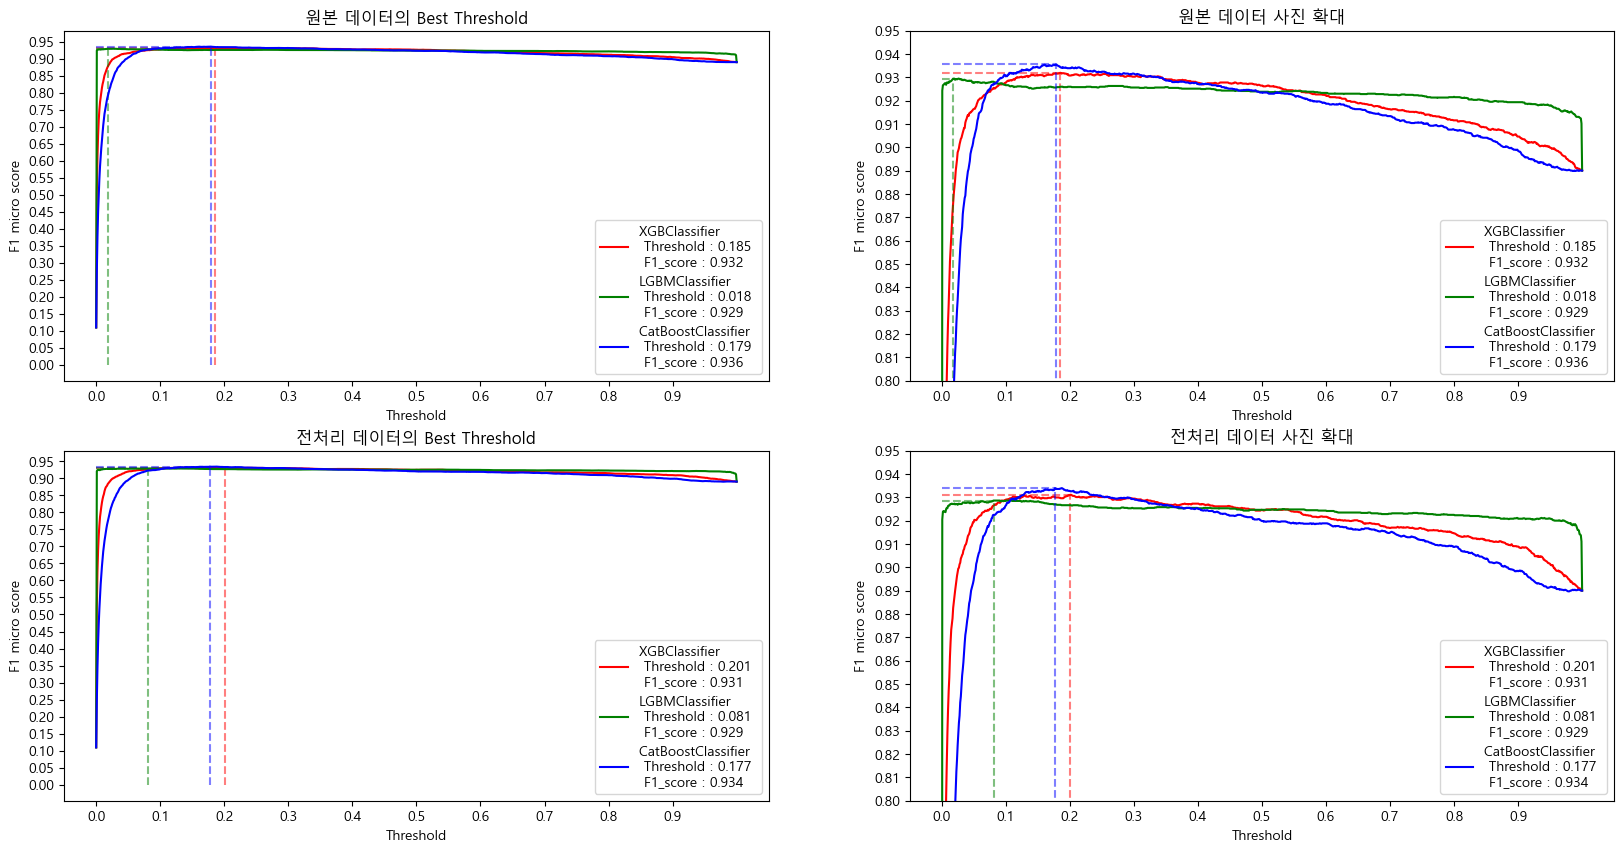

In [40]:
colors = ['red','green','blue','orange']
boosting_models_name = ['XGBClassifier','LGBMClassifier','CatBoostClassifier']

plt.figure(figsize = [20,10])

plt.subplot(2,2,1)
threshold_graph(y_raw_test,raw_proba_list,colors,boosting_models_name)
plt.title('원본 데이터의 Best Threshold')

plt.subplot(2,2,2)
threshold_graph_plussize(y_raw_test,raw_proba_list,colors,boosting_models_name)
plt.title('원본 데이터 사진 확대')

plt.subplot(2,2,3)
threshold_graph(y_pre_test,pre_proba_list,colors,boosting_models_name)
plt.title('전처리 데이터의 Best Threshold')

plt.subplot(2,2,4)
threshold_graph_plussize(y_pre_test,pre_proba_list,colors,boosting_models_name)
plt.title('전처리 데이터 사진 확대')


# 결론

### 모델 간 F1 score 값 비교

In [41]:
full_models = raw_models + raw_boosting_models  

thr_list = np.arange(0,1.001,0.001)

best_thr = []
best_fpr = []

for model in full_models:
    
    proba = model.predict_proba(x_raw_test)[:,1]
    
    f1_list = []
    
    for thr in thr_list:
        
        result = np.where(proba > thr,1,0)
        f1_list.append(f1_score(y_raw_test,result, average = 'micro'))
        
    idx = np.argmax(f1_list)
    best_fpr.append(max(f1_list))
    best_thr.append(thr_list[idx])

In [42]:
full_models_name = models_name + boosting_models_name

result = pd.DataFrame({'Models': full_models_name,
              'F1_score':best_fpr,
              'Threshold':best_thr}).sort_values(by = 'F1_score', ascending = False).reset_index(drop = True)

In [43]:
result

,Models,F1_score,Threshold
0,CatBoostClassifier,0.935596,0.179
1,RandomForestClassifier,0.931954,0.320
2,XGBClassifier,0.931954,0.185
3,LGBMClassifier,0.929470,0.018
4,KNeighborsClassifier,0.926490,0.425
5,DecisionTreeClassifier,0.890894,0.432
6,LogisticRegression,0.890066,0.416


Text(0.5, 0, 'F1 Score')

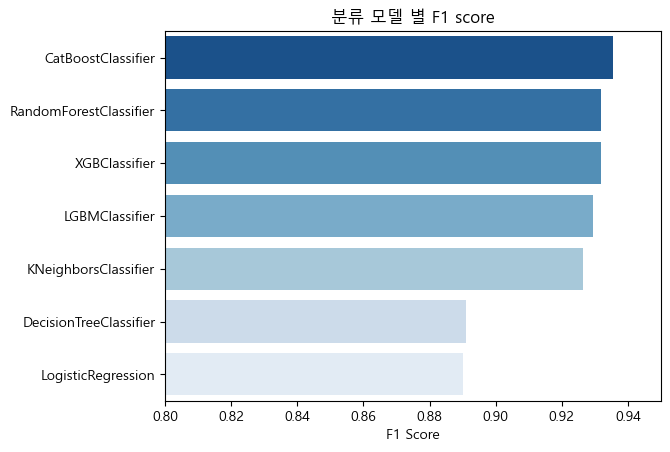

In [44]:
sns.barplot(data = result,
            x = 'F1_score',
            y = 'Models',
            palette = 'Blues_r')
plt.xlim([0.8,0.95])
plt.title('분류 모델 별 F1 score')
plt.ylabel('')
plt.xlabel('F1 Score')


Text(0.5, 0, 'F1 Score')

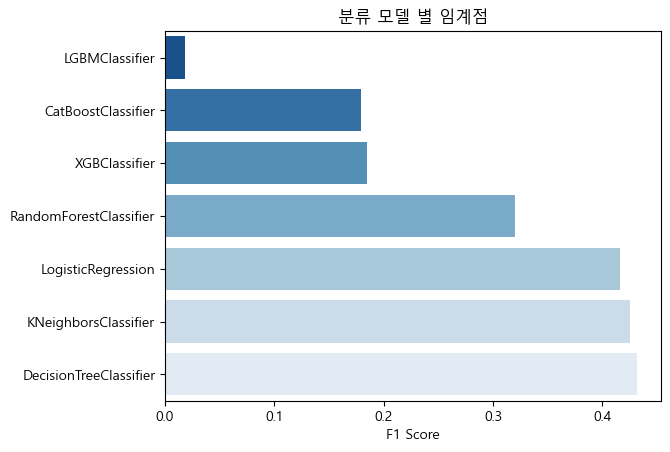

In [45]:
sns.barplot(data = result.sort_values(by ='Threshold'),
            x = 'Threshold',
            y = 'Models',
            palette = 'Blues_r')
plt.title('분류 모델 별 임계점')
plt.ylabel('')
plt.xlabel('F1 Score')
